# LinearSVM

In [4]:
from sklearn.svm import SVC
from sklearn.datasets import make_blobs

In [16]:
# 가상의 분류용 데이터
X, y = make_blobs(n_samples=100, centers=2,
                  cluster_std=0.5, random_state=30)

In [18]:
X.shape, y  # (x1, x2, y)*100 & center = 2; 2진분류

((100, 2),
 array([1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
        0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
        0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0]))

sklearn.svm.SVC : 선형&비선형 SVC 모형 모듈
-  LinearSVM을 하고 싶다면?
- kernel = 'linear'로 설정해야한다.

In [21]:
SVC?

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.2,
                                                   shuffle=True)
model_svc = SVC(C=1e10, kernel='linear').fit(X_train, y_train)   # linearSVM하려고 kernel = linear
# C를 늘리면? 규제가 심해짐=overfitting
print('Learning finished!')

Learning finished!


In [24]:
model_svc.n_support_.shape  # 2행 1열 -> 2행 : 2진분류

(2,)

In [25]:
model_svc.n_support_ # support vector 3개(0class : 1개, 1class : 2개)

array([1, 2])

n_support_ : support vector의 개수

In [27]:
model_svc.support_vectors_   # support vector의 좌표

array([[ 3.05460221, -3.67969147],
       [ 2.86846825, -5.74247281],
       [ 3.29037833, -5.73037285]])

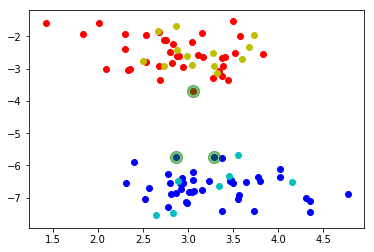

In [29]:
from matplotlib import pyplot as plt

# trainset data 의 좌표
# class 1인 data => blue
plt.scatter(X_train[y_train==1, 0],
            X_train[y_train==1, 1], c='b')
# class 0인 data => red
plt.scatter(X_train[y_train==0, 0],
            X_train[y_train==0, 1], c='r')

# support vector인 data에는 size 150, green, 반투명하게 표시해주기
plt.scatter(model_svc.support_vectors_[:, 0],
            model_svc.support_vectors_[:, 1],
            s=150, alpha=0.5, c='g')

# testset data
# class 1인 testset -> cyan
plt.scatter(X_test[y_test==1, 0],
            X_test[y_test==1, 1], c='c')

# class 1 인 testset -> yellow
plt.scatter(X_test[y_test==0, 0],
            X_test[y_test==0, 1], c='y', linewidth=1)

plt.show()

In [30]:
model_svc.score(X_test, y_test)

1.0

### 다른 방식으로 LinearSVM 구현하기

In [31]:
from sklearn.svm import LinearSVC

In [14]:
model_svc2 = LinearSVC(C=1, loss='hinge').fit(X_train, y_train)

In [15]:
model_svc2.score(X_test, y_test)

1.0

homework) C값을 0부터 0.1 0.2 ~ 1까지 / 1,2,3 ~ 10까지 바꿔가며 acc의 변화추이를 시각화 해보기

In [96]:
from sklearn.datasets import load_wine

In [103]:
X, y = make_blobs(n_samples=500, centers=2,
                  cluster_std=0.8, random_state=50)
X.shape, y

((500, 2),
 array([1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
        1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
        1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
        1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
        0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
        1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
        1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
        0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
        0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
        0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 0

In [109]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.3,
                                                   shuffle=True)
model_svc = SVC(C=0.1, kernel='linear').fit(X_train, y_train) 

In [110]:
model_svc.support_vectors_

array([[-1.25156805, -4.31755628],
       [-0.90598794, -4.15921128],
       [-2.30239791, -5.02606911],
       [-1.55239754, -3.95964688],
       [-2.99337324, -3.67282526],
       [-4.56531579, -4.38380919],
       [-2.59275372, -3.01186117],
       [-3.13228578, -2.69969499],
       [-2.89099332, -2.13834301]])

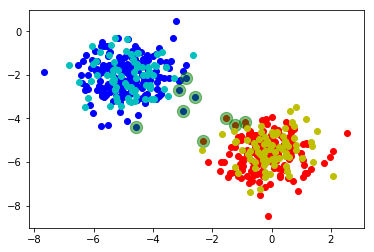

In [111]:
from matplotlib import pyplot as plt

# trainset data 의 좌표
# class 1인 data => blue
plt.scatter(X_train[y_train==1, 0],
            X_train[y_train==1, 1], c='b')
# class 0인 data => red
plt.scatter(X_train[y_train==0, 0],
            X_train[y_train==0, 1], c='r')

# support vector인 data에는 size 150, green, 반투명하게 표시해주기
plt.scatter(model_svc.support_vectors_[:, 0],
            model_svc.support_vectors_[:, 1],
            s=150, alpha=0.5, c='g')

# testset data
# class 1인 testset -> cyan
plt.scatter(X_test[y_test==1, 0],
            X_test[y_test==1, 1], c='c')

# class 1 인 testset -> yellow
plt.scatter(X_test[y_test==0, 0],
            X_test[y_test==0, 1], c='y', linewidth=1)

plt.show()

In [112]:
model_svc.score(X_test, y_test)

1.0

In [1]:
from sklearn.datasets import load_wine

In [2]:
wine = load_wine()
wine.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [3]:
wine['data'][:,0]*=10000

In [4]:
import pandas as pd
X_w_df = pd.DataFrame(wine['data'])
X_w_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,142300.0,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,132000.0,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,131600.0,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,143700.0,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,132400.0,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


만약 x축과 y축의 단위가 너무 달라서 그래프가 이상하게 그려진다면? margin이 이상하게 그려질수도  
두개 간격을 비슷하게 맞춰줘야함!! scaling

In [ ]:
from sklearn.model_selection import train_test_split
X_tr, X_ts, y_tr, y_ts = train_test_split(X_w_df,
                                          wine['target'],
                                          test_size=0.2,
                                          shuffle=True)

In [ ]:
from sklearn.svm import SVC
model=SVC(C=1e10, kernel='linear')

In [ ]:
model.fit(X_tr, y_tr)

In [ ]:
model.score(X_ts,y_ts)